In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer

In [76]:
df = pd.read_csv('../Resources/transactions.csv')

In [77]:
df.head()

,Transaction Number,Transaction Date,Transaction Type,Transaction sub type,Registration type,Is Free Hold?,Usage,Area,Property Type,Property Sub Type,...,Property Size (sq.m),Room(s),Parking,Nearest Metro,Nearest Mall,Nearest Landmark,No. of Buyer,No. of Seller,Master Project,Project
0,102-1-2023,2023-01-02 07:25:49,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,BUSINESS BAY,Unit,Flat,...,105.75,2 B/R,1,Business Bay Metro Station,Dubai Mall,Downtown Dubai,1,1,NaN,AYKON CITY 3
1,102-10-2023,2023-01-02 08:06:49,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,BUSINESS BAY,Unit,Flat,...,52.29,Studio,1,Business Bay Metro Station,Dubai Mall,Downtown Dubai,1,1,NaN,AYKON CITY 3
2,102-100-2023,2023-01-02 09:01:22,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,Al Wasl,Unit,Flat,...,161.32,2 B/R,1,NaN,NaN,NaN,1,1,NaN,Fern
3,102-1000-2023,2023-01-05 13:26:06,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,JUMEIRAH LAKES TOWERS,Unit,Flat,...,99.64,2 B/R,1,Damac Properties,Marina Mall,Burj Al Arab,1,1,NaN,SEVEN CITY JLT
4,102-10000-2023,2023-03-01 16:02:19,Sales,Sell - Pre registration,Off-Plan,Free Hold,Residential,JUMEIRAH VILLAGE CIRCLE,Unit,Flat,...,63.95,1 B/R,1,Dubai Internet City,Marina Mall,Sports City Swimming Academy,1,1,NaN,Binghatti Corner


In [78]:
df = df.drop(columns=['Transaction Number', 'Transaction Date','Master Project','Project','Transaction sub type','Property Sub Type','Transaction Size (sq.m)','Parking','Nearest Metro','Nearest Mall', 'Nearest Landmark'])

In [79]:
df = df[df["Property Type"] != "Land"]

In [80]:
df = df.dropna()

In [81]:
df

,Transaction Type,Registration type,Is Free Hold?,Usage,Area,Property Type,Amount,Property Size (sq.m),Room(s),No. of Buyer,No. of Seller
0,Sales,Off-Plan,Free Hold,Residential,BUSINESS BAY,Unit,2631000.0,105.75,2 B/R,1,1
1,Sales,Off-Plan,Free Hold,Residential,BUSINESS BAY,Unit,1466000.0,52.29,Studio,1,1
2,Sales,Off-Plan,Free Hold,Residential,Al Wasl,Unit,3309000.0,161.32,2 B/R,1,1
3,Sales,Off-Plan,Free Hold,Residential,JUMEIRAH LAKES TOWERS,Unit,1170137.0,99.64,2 B/R,1,1
4,Sales,Off-Plan,Free Hold,Residential,JUMEIRAH VILLAGE CIRCLE,Unit,590000.0,63.95,1 B/R,1,1
...,...,...,...,...,...,...,...,...,...,...,...
81596,Sales,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,829878.0,106.65,2 B/R,0,0
81597,Sales,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,907122.0,127.92,2 B/R,0,0
81598,Sales,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,583109.0,77.22,1 B/R,0,0
81599,Sales,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,600000.0,85.84,1 B/R,0,0


In [82]:
# Remove outliers with 3*STD
mean = df['Amount'].mean()
std_dev = df['Amount'].std()
threshod = 3 * std_dev
df = df[abs(df["Amount"] - mean) <= threshod]
df

,Transaction Type,Registration type,Is Free Hold?,Usage,Area,Property Type,Amount,Property Size (sq.m),Room(s),No. of Buyer,No. of Seller
0,Sales,Off-Plan,Free Hold,Residential,BUSINESS BAY,Unit,2631000.0,105.75,2 B/R,1,1
1,Sales,Off-Plan,Free Hold,Residential,BUSINESS BAY,Unit,1466000.0,52.29,Studio,1,1
2,Sales,Off-Plan,Free Hold,Residential,Al Wasl,Unit,3309000.0,161.32,2 B/R,1,1
3,Sales,Off-Plan,Free Hold,Residential,JUMEIRAH LAKES TOWERS,Unit,1170137.0,99.64,2 B/R,1,1
4,Sales,Off-Plan,Free Hold,Residential,JUMEIRAH VILLAGE CIRCLE,Unit,590000.0,63.95,1 B/R,1,1
...,...,...,...,...,...,...,...,...,...,...,...
81596,Sales,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,829878.0,106.65,2 B/R,0,0
81597,Sales,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,907122.0,127.92,2 B/R,0,0
81598,Sales,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,583109.0,77.22,1 B/R,0,0
81599,Sales,Ready,Non Free Hold,Residential,SILICON OASIS,Unit,600000.0,85.84,1 B/R,0,0


In [83]:
df = pd.get_dummies(df)

In [84]:
df

,Amount,Property Size (sq.m),No. of Buyer,No. of Seller,Transaction Type_Gifts,Transaction Type_Mortgage,Transaction Type_Sales,Registration type_Off-Plan,Registration type_Ready,Is Free Hold?_Free Hold,...,Room(s)_4 B/R,Room(s)_5 B/R,Room(s)_6 B/R,Room(s)_GYM,Room(s)_Hotel,Room(s)_Office,Room(s)_PENTHOUSE,Room(s)_Shop,Room(s)_Single Room,Room(s)_Studio
0,2631000.0,105.75,1,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1466000.0,52.29,1,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,3309000.0,161.32,1,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1170137.0,99.64,1,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,590000.0,63.95,1,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81596,829878.0,106.65,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
81597,907122.0,127.92,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
81598,583109.0,77.22,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
81599,600000.0,85.84,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
X = df.drop('Amount', axis=1)
y = df['Amount']

In [86]:
# Apply log transformation to the target variable
y_log = np.log(y)  

<AxesSubplot:ylabel='Frequency'>

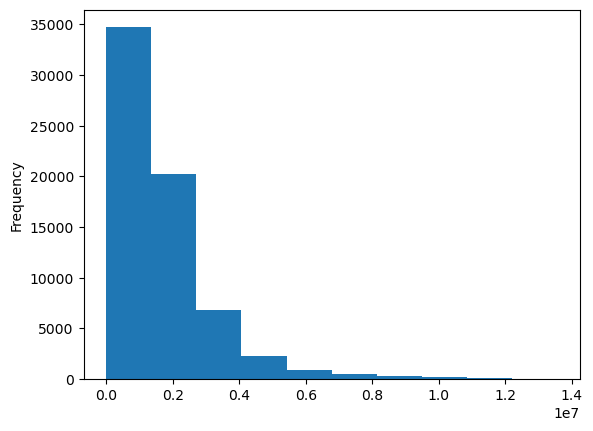

In [87]:
y.plot.hist()

(array([1.0000e+00, 1.0000e+00, 0.0000e+00, 8.0000e+00, 2.4000e+01,
        5.7000e+01, 4.4690e+03, 2.8433e+04, 2.8994e+04, 4.0380e+03]),
 array([ 4.60517019,  5.78686875,  6.96856731,  8.15026588,  9.33196444,
        10.513663  , 11.69536156, 12.87706013, 14.05875869, 15.24045725,
        16.42215582]),
 <BarContainer object of 10 artists>)

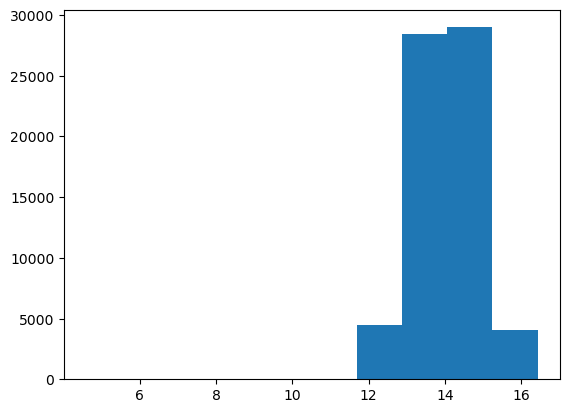

In [88]:
plt.hist(y_log)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

## Linear regression model

In [90]:
# Create a linear regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Predict on the test data
y_pred_log = linear_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_log)

print(f"Mean Absolue Error:{mae:.2f}")
r2_log = r2_score(y_test, y_pred_log)
print(f"R-squared (on log-transformed data): {r2_log:.2f}")

# K-Fold cross validation with k=5 using MAE
cv_scores = cross_val_score(linear_model, X, y_log, cv=5, scoring='neg_mean_absolute_error')
mean_mae = -np.mean(cv_scores)

print("Cross-Validation MAE Scores:", -cv_scores)
print(f"Mean MAE: {mean_mae:.2f}")

Mean Absolue Error:0.23
R-squared (on log-transformed data): 0.82
Cross-Validation MAE Scores: [0.1747799  0.18526334 0.2361711  0.29551529 0.38856678]
Mean MAE: 0.26


In [91]:
# Top 20 positive and negative significant factors
linear_coefficients = linear_model.coef_
# Display the coefficients along with their corresponding feature names
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': linear_coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)
print(coefficients_df.head(20))
print(coefficients_df.tail(20))

                                  Feature  Coefficient
141                         Room(s)_6 B/R     2.154879
138                         Room(s)_3 B/R     2.150622
139                         Room(s)_4 B/R     2.136229
140                         Room(s)_5 B/R     2.114157
145                     Room(s)_PENTHOUSE     2.063826
137                         Room(s)_2 B/R     1.937215
146                          Room(s)_Shop     1.935137
72                       Area_JUMEIRA BAY     1.759690
136                         Room(s)_1 B/R     1.614416
142                           Room(s)_GYM     1.555375
144                        Room(s)_Office     1.541954
70                          Area_Island 2     1.362612
132                    Area_Zaabeel First     1.360298
32                        Area_BLUEWATERS     1.357589
104                    Area_PEARL JUMEIRA     1.332934
148                        Room(s)_Studio     1.320888
98                       Area_Marsa Dubai     1.023939
46        

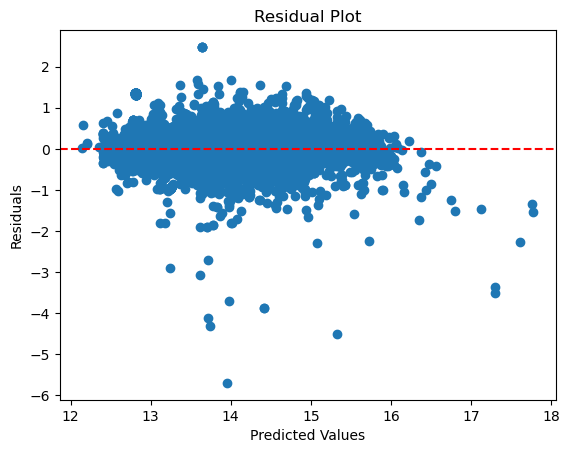

In [92]:
# Residuals (difference between actual and predicted values)
residuals = y_test - y_pred_log

# Plot residuals against predicted values
plt.scatter(y_pred_log, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Hyperparameter Tuning for lasso and ridge

In [94]:
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
# Define the scoring metric (e.g., negative RMSE)
scoring = make_scorer(lambda y_test, y_pred_log: -np.sqrt(mean_squared_error(y_test, y_pred_log)))
# Lasso Regression Hyperparameter Tuning
lasso_model = Lasso()
lasso_grid = GridSearchCV(lasso_model, param_grid={'alpha': alpha_values}, scoring=scoring, cv=5)
lasso_grid.fit(X_train, y_train)

# Ridge Regression Hyperparameter Tuning
ridge_model = Ridge()
ridge_grid = GridSearchCV(ridge_model, param_grid={'alpha': alpha_values}, scoring=scoring, cv=5)
ridge_grid.fit(X_train, y_train)

# Get the best alpha values
best_alpha_lasso = lasso_grid.best_params_['alpha']
best_alpha_ridge = ridge_grid.best_params_['alpha']

# Retrain models with best alpha values
lasso_best = Lasso(alpha=best_alpha_lasso)
lasso_best.fit(X_train, y_train)

Lasso(alpha=0.001)

In [95]:
ridge_best = Ridge(alpha=best_alpha_ridge)
ridge_best.fit(X_train, y_train)

Ridge(alpha=0.001)

## LASSO regression model

In [96]:
# Create Lasso regression model
lasso_model = Lasso(alpha=0.001)  # You can adjust the value of alpha (regularization strength)

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.001)

In [98]:
# Predict on the test data
y_pred_log = lasso_model.predict(X_test)
# Evaluate the model 
mae = mean_absolute_error(y_test, y_pred_log)
r2 = r2_score(y_test, y_pred_log)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared (on log-transformed data): {r2:.2f}")

# K-Fold cross validation with k=5 using MAE
cv_scores = cross_val_score(lasso_model, X, y_log, cv=5, scoring='neg_mean_absolute_error')
mean_mae = -np.mean(cv_scores)
print("Cross-Validation MAE Scores:", -cv_scores)
print(f"Mean MAE: {mean_mae:.2f}")

Mean Absolute Error: 0.26
R-squared (on log-transformed data): 0.79
Cross-Validation MAE Scores: [0.22915109 0.23623965 0.28043364 0.33462606 0.39688963]
Mean MAE: 0.30


In [99]:
# Top 20 positive and negative significant factors
lasso_coefficients = lasso_model.coef_
# Display the coefficients along with their corresponding feature names
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)
print(coefficients_df.head(20))
print(coefficients_df.tail(20))

                           Feature  Coefficient
98                Area_Marsa Dubai     1.000153
46              Area_DUBAI HARBOUR     0.905387
32                 Area_BLUEWATERS     0.821706
132             Area_Zaabeel First     0.813548
103             Area_PALM JUMEIRAH     0.647086
33               Area_BURJ KHALIFA     0.598423
8          Is Free Hold?_Free Hold     0.488505
82                     Area_LA MER     0.445621
38                  Area_CITY WALK     0.411496
124           Area_Um Suqaim Third     0.405350
24                   Area_Al Kifaf     0.380534
139                  Room(s)_4 B/R     0.367628
27                    Area_Al Wasl     0.331746
73   Area_JUMEIRAH BEACH RESIDENCE     0.331713
43        Area_DUBAI CREEK HARBOUR     0.309721
34               Area_BUSINESS BAY     0.280815
138                  Room(s)_3 B/R     0.279021
133            Area_Zaabeel Second     0.277898
100                    Area_Mirdif     0.246500
140                  Room(s)_5 B/R     0

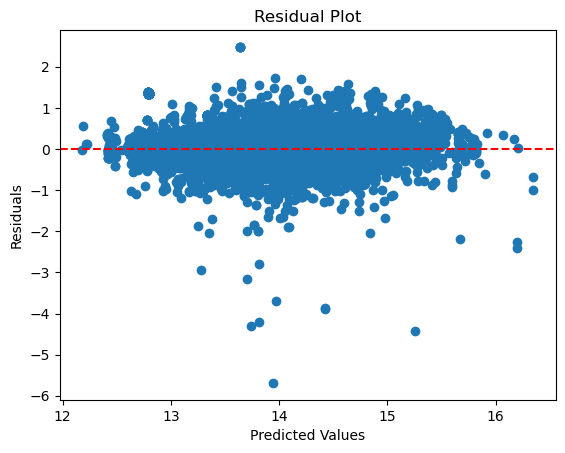

In [100]:
# Residuals (difference between actual and predicted values)
residuals = y_test - y_pred_log

# Plot residuals against predicted values
plt.scatter(y_pred_log, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Ridge regression model

In [101]:
alpha = 0.001  # Regularization parameter (higher values increase regularization)
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.001)

In [102]:
# Predict on the test data
y_pred_log = ridge_model.predict(X_test)

# Evaluate the model 
mae = mean_absolute_error(y_test, y_pred_log)
r2 = r2_score(y_test, y_pred_log)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared (on log-transformed data): {r2:.2f}")

# K-Fold cross validation with k=5 using MAE
cv_scores = cross_val_score(ridge_model, X, y_log, cv=5, scoring='neg_mean_absolute_error')
mean_mae = -np.mean(cv_scores)
print("Cross-Validation MAE Scores:", -cv_scores)
print(f"Mean MAE: {mean_mae:.2f}")

Mean Absolute Error: 0.23
R-squared (on log-transformed data): 0.82
Cross-Validation MAE Scores: [0.17478313 0.18526841 0.23617522 0.29551813 0.38856538]
Mean MAE: 0.26


In [103]:
# Top 20 positive and negative significant factors
ridge_coefficients = ridge_model.coef_
# Display the coefficients along with their corresponding feature names
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge_coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)
print(coefficients_df.head(20))
print(coefficients_df.tail(20))

                                  Feature  Coefficient
141                         Room(s)_6 B/R     2.153119
138                         Room(s)_3 B/R     2.148893
139                         Room(s)_4 B/R     2.134659
140                         Room(s)_5 B/R     2.112737
145                     Room(s)_PENTHOUSE     2.062237
137                         Room(s)_2 B/R     1.935386
146                          Room(s)_Shop     1.933323
72                       Area_JUMEIRA BAY     1.759503
136                         Room(s)_1 B/R     1.612515
142                           Room(s)_GYM     1.553641
144                        Room(s)_Office     1.540136
70                          Area_Island 2     1.362390
132                    Area_Zaabeel First     1.360389
32                        Area_BLUEWATERS     1.357620
104                    Area_PEARL JUMEIRA     1.332353
148                        Room(s)_Studio     1.318934
98                       Area_Marsa Dubai     1.023968
46        

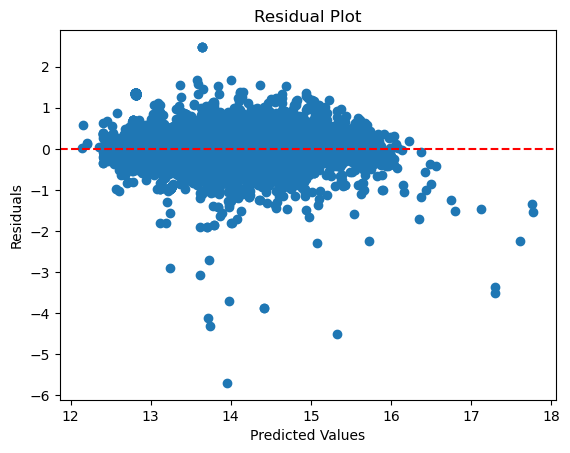

In [104]:
# Residuals (difference between actual and predicted values)
residuals = y_test - y_pred_log

# Plot residuals against predicted values
plt.scatter(y_pred_log, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Decision Tree model

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
# Define the range of max_depth values to search over
max_depth_values = [30,35]
min_samples_split_values = [2, 5, 10, 20]
min_samples_leaf_values = [1, 2, 4, 8]

# Create a Decision Tree Regressor
tree_model = DecisionTreeRegressor()
param_grid = {
    'min_samples_split': min_samples_split_values,
    'min_samples_leaf': min_samples_leaf_values,
    'max_depth': max_depth_values
}
# Define the GridSearchCV with the hyperparameters and values to search
grid_search = GridSearchCV(estimator=tree_model, param_grid = param_grid, 
                           scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV to your training data
grid_search.fit(X_train, y_train)

# Get the best max_depth value
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']
best_min_samples_leaf = grid_search.best_params_['min_samples_leaf']
print(f"Best max_depth: {best_max_depth}")
print(f"Best min_samples_split: {best_min_samples_split}")
print(f"Best min_samples_leaf: {best_min_samples_leaf}")

Best max_depth: 35
Best min_samples_split: 10
Best min_samples_leaf: 1


In [107]:
# Create a Decision Tree Regressor model
tree_model = DecisionTreeRegressor(max_depth=35, min_samples_split=10, min_samples_leaf=1, random_state=42)

# Fit the model to the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree_model.predict(X_test)

# Evaluate the model 
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R-squared (on log-transformed data): {r2:.2f}")

# K-Fold cross validation with k=5 using MAE
cv_scores = cross_val_score(tree_model, X, y, cv=5, scoring='neg_mean_absolute_error')
mean_mae = -np.mean(cv_scores)
print("Cross-Validation MAE Scores:", -cv_scores)
print(f"Mean MAE: {mean_mae:.2f}")

Mean Absolute Error: 251397.36492716824
R-squared (on log-transformed data): 0.86
Cross-Validation MAE Scores: [186043.71084986 250073.56218143 345824.4614705  489274.35829924
 498982.9885231 ]
Mean MAE: 354039.82


In [108]:
# Make predictions on the training data
y_train_pred = tree_model.predict(X_train)

# Evaluate the model 
mae_train = mean_absolute_error(y_train,y_train_pred)
r2_train = r2_score(y_train,y_train_pred)
print(f"Mean Absolute Error: {mae_train}")
print(f"R-squared (on log-transformed data): {r2_train:.2f}")

# K-Fold cross validation with k=5 using MAE
cv_scores = cross_val_score(tree_model, X, y, cv=5, scoring='neg_mean_absolute_error')
mean_mae = -np.mean(cv_scores)
print("Cross-Validation MAE Scores:", -cv_scores)
print(f"Mean MAE: {mean_mae:.2f}")

Mean Absolute Error: 157504.83416867084
R-squared (on log-transformed data): 0.95
Cross-Validation MAE Scores: [186043.71084986 250073.56218143 345824.4614705  489274.35829924
 498982.9885231 ]
Mean MAE: 354039.82


In [109]:
# Get feature importances
feature_importances = tree_model.feature_importances_

# Create a list of tuples (feature_name, importance) for sorting
feature_importance_tuples = [(feature, importance) for feature, importance in zip(X.columns, feature_importances)]

# Sort the list of tuples by importance in descending order
sorted_feature_importances = sorted(feature_importance_tuples, key=lambda x: x[1], reverse=True)

# Print sorted feature importances
for feature, importance in sorted_feature_importances[:20]:
    print(f"{feature}: {importance:.4f}")

Property Size (sq.m): 0.5093
Area_Marsa Dubai: 0.0540
Area_DUBAI HARBOUR: 0.0458
Registration type_Ready: 0.0404
Transaction Type_Mortgage: 0.0399
Property Type_Building: 0.0326
Area_BURJ KHALIFA: 0.0266
Transaction Type_Sales: 0.0221
Area_PALM JUMEIRAH: 0.0213
Registration type_Off-Plan: 0.0150
Area_BLUEWATERS: 0.0149
Room(s)_3 B/R: 0.0107
Area_DUBAI CREEK HARBOUR: 0.0094
Area_BUSINESS BAY: 0.0092
Area_JUMEIRAH VILLAGE CIRCLE: 0.0085
Area_Zaabeel First: 0.0080
Area_LA MER: 0.0068
Area_JUMEIRAH BEACH RESIDENCE: 0.0064
Room(s)_2 B/R: 0.0064
Area_DUBAI MARINA: 0.0062


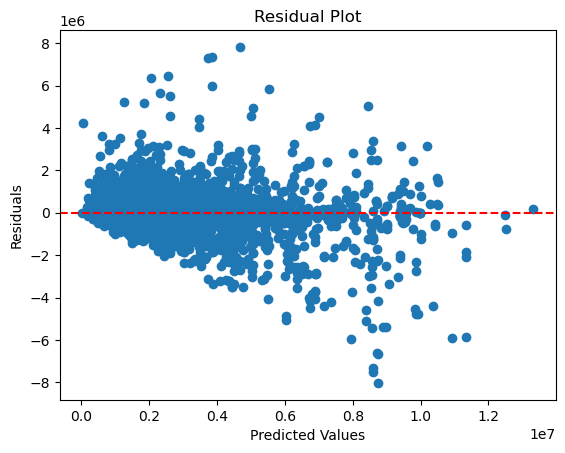

In [110]:
# Residuals (difference between actual and predicted values)
residuals = y_test - y_pred

# Plot residuals against predicted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()